<a href="https://colab.research.google.com/github/fidousAbir/DeepL_project/blob/main/projetdeep_detect_can.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from tensorflow.keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np
import glob
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras import losses
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [ ]:
!nvidia-smi

Fri Dec  3 11:47:49 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install -U mxnet-cu101==1.7.0

     |███████████████████████████████▌| 834.1 MB 1.4 MB/s eta 0:00:09tcmalloc: large alloc 1147494400 bytes == 0x56258c0b4000 @  0x7fb34ee33615 0x5625520114cc 0x5625520f147a 0x5625520142ed 0x562552105e1d 0x562552087e99 0x5625520829ee 0x562552015bda 0x562552087d00 0x5625520829ee 0x562552015bda 0x562552084737 0x562552106c66 0x562552083daf 0x562552106c66 0x562552083daf 0x562552106c66 0x562552083daf 0x562552016039 0x562552059409 0x562552014c52 0x562552087c25 0x5625520829ee 0x562552015bda 0x562552084737 0x5625520829ee 0x562552015bda 0x562552083915 0x562552015afa 0x562552083c0d 0x5625520829ee
     |████████████████████████████████| 846.0 MB 21 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
clahe = cv2.createCLAHE(clipLimit =4.0, tileGridSize=(5,5))

In [ ]:
f = r'/content/drive/MyDrive/Benign_Masses'
os.listdir(f)
images1=[]
for file in os.listdir(f):

    f_img=f+"/"+file
    img = Image.open(f_img)
    img = img.resize((200,200))
    img1=np.asarray(img)
    cl_img = clahe.apply(img1)
    images1.append(cl_img)




In [ ]:
images1 = np.asarray(images1)
images1.shape



(10866, 200, 200)

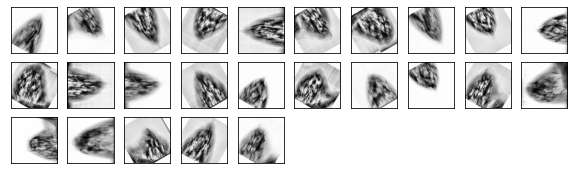

In [ ]:
plt.figure(figsize =(10, 10))
for i in range(25):
    plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images1[i], cmap = plt.cm.binary)
plt.show()



In [ ]:
f = r'/content/drive/MyDrive/Malignant_Masses'
os.listdir(f)
images2=[]
for file in os.listdir(f):

    f_img=f+"/"+file
    img = Image.open(f_img)
    img = img.resize((200,200))
    img12=np.asarray(img)
    cl_img = clahe.apply(img12)
    images2.append(cl_img)

In [ ]:
images2 = np.asarray(images2)
images2.shape


(13710, 200, 200)

In [ ]:
benign_train_label = np.zeros(len(images2))
benign_train_label.shape


(13710,)

In [ ]:
malign_train_label = np.ones(len(images1))

In [ ]:
images1 = np.asarray(images1)
images1.shape

images2.shape

(13710, 200, 200)

In [ ]:
X_data = np.concatenate((images1, images2), axis = 0)
X_data.shape
Y_label = np.concatenate((benign_train_label, malign_train_label), axis = 0)
Y_label.shape


(24576,)

In [ ]:
from sklearn.utils import shuffle
X_data,Y_label, = shuffle(X_data, Y_label, random_state=0)



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data,Y_label, test_size=0.33,random_state=0)
x_train1=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
x_test1=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)



In [ ]:
x_test1.shape
y_train1=to_categorical(y_train)#il suffit d'avoir 15bit
y_test1=to_categorical(y_test)
y_test1.shape




y_train1=to_categorical(y_train)#il suffit d'avoir 15bit
y_test1=to_categorical(y_test)




y_train2=y_train1[:,1:] #il suffit d'eliminer 1ere colonne innutile
y_test2=y_test1[:,1:]





In [ ]:
classifier = Sequential()
classifier.add(Convolution2D(filters = 32,kernel_size = 9,input_shape = (200,200,1),activation = 'relu'))
classifier.add(MaxPooling2D(8,8))
classifier.add(Flatten()) #Input Layer is ready



classifier.add(Dense(activation= 'relu',units=200))
classifier.add(Dense(activation= 'sigmoid',units=1))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])





In [ ]:
history=classifier.fit(x_train1, y_train2,batch_size=32,epochs=30,validation_data=(x_test1, y_test2),shuffle=True)


Epoch 1/30
515/515 [==============================] - 32s 43ms/step - loss: 2.5201 - accuracy: 0.6302 - val_loss: 0.6044 - val_accuracy: 0.6544
Epoch 2/30
515/515 [==============================] - 21s 41ms/step - loss: 0.5699 - accuracy: 0.6955 - val_loss: 0.5749 - val_accuracy: 0.6833
Epoch 3/30
515/515 [==============================] - 22s 43ms/step - loss: 0.5038 - accuracy: 0.7487 - val_loss: 0.5486 - val_accuracy: 0.7018
Epoch 4/30
515/515 [==============================] - 21s 41ms/step - loss: 0.4352 - accuracy: 0.7885 - val_loss: 0.5649 - val_accuracy: 0.7214
Epoch 5/30
515/515 [==============================] - 22s 43ms/step - loss: 0.3795 - accuracy: 0.8238 - val_loss: 0.5670 - val_accuracy: 0.7274
Epoch 6/30
515/515 [==============================] - 21s 41ms/step - loss: 0.3279 - accuracy: 0.8507 - val_loss: 0.6147 - val_accuracy: 0.7369
Epoch 7/30
515/515 [==============================] - 22s 43ms/step - loss: 0.2944 - accuracy: 0.8694 - val_loss: 0.6315 - val_accuracy:

In [ ]:
classifier.save("my_h5_model.h5")

NameError: ignored

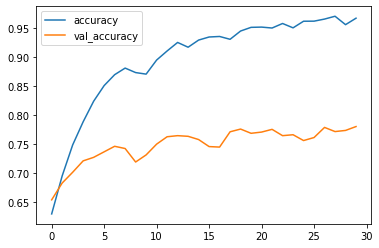

In [ ]:
import pandas as pd
losses = pd.DataFrame(classifier.history.history)
losses[['accuracy', 'val_accuracy']].plot()

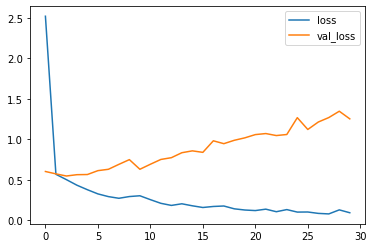

In [ ]:
losses[['loss', 'val_loss']].plot()

In [ ]:
scores = classifier.evaluate(x_test1, y_test2, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

NameError: ignored

In [ ]:
!pip install pyyaml h5py

In [ ]:
!mkdir -p saved_model

In [ ]:
classifier.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [ ]:
!ls saved_model

my_model


In [ ]:
!ls saved_model/my_model

assets	keras_metadata.pb  saved_model.pb  variables


In [ ]:
t = time.time()

export_path_keras = "./{}.h5".format(int(t))
print(export_path_keras)

model.save(export_path_keras)

NameError: ignored